# How much did this whole thing actually change things?
#### lets look into the the impact on the SalishSeaCast files in a specific spot in the JdF

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pathlib import Path

#### first lets decide on a location in the Salish Sea that feels good to dig into

In [2]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')

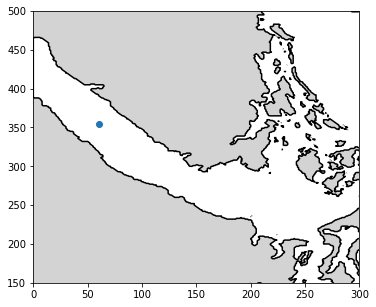

In [3]:
fig, ax = plt.subplots(1,1,figsize=(8,5))

ax.contourf(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
ax.set_xlim([0, 300])
ax.set_ylim([150, 500])
ax.set_aspect(5/7)

ax.scatter(60,35,)

In [4]:
#find out how deep this location is and pick the middle
mesh.tmask[0,:,355,60]
#pick z=15

<xarray.DataArray 'tmask' (z: 40)>
array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)
Dimensions without coordinates: z
Attributes:
    standard_name:  tmask
    long_name:      mask for T-grid and W-grid
    flag_values:    0, 1
    flag_meanings:  land, water

#### plot x=60, y=355, z=15 over time in the diff files

In [5]:
dates= [dt.datetime(2019,3,2)+dt.timedelta(days=i) for i in range(int(3))]

In [13]:
# first the original hourly files
path = Path("/results/SalishSea/nowcast-green.201812/")
drop_vars = (
    "nav_lon", "bounds_lon", "nav_lat", "bounds_lat", "area", "depthu_bounds", 
    "time_centered", "time_centered_bounds", "time_counter_bounds",
)

files = [sorted(path.glob("{:%d%b%y}".format(day).lower()+"/SalishSea_1h_*_grid_U.nc")) for day in dates]

mydata = xr.open_mfdataset(files, drop_variables=drop_vars)
u_og = mydata['vozocrtx']

drop_vars = (
    "nav_lon", "bounds_lon", "nav_lat", "bounds_lat", "area", "depthv_bounds", 
    "time_centered", "time_centered_bounds", "time_counter_bounds",
)

files = [sorted(path.glob("{:%d%b%y}".format(day).lower()+"/SalishSea_1h_*_grid_V.nc")) for day in dates]

mydata = xr.open_mfdataset(files, drop_variables=drop_vars)
v_og = mydata['vomecrty']
t_og = mydata['time_counter']

In [14]:
# then the original daily files
path = Path("/results/SalishSea/nowcast-green.201812/")
drop_vars = (
    "nav_lon", "bounds_lon", "nav_lat", "bounds_lat", "area", "depthu_bounds", 
    "time_centered", "time_centered_bounds", "time_counter_bounds",
)

files = [sorted(path.glob("{:%d%b%y}".format(day).lower()+"/SalishSea_1d_*_grid_U.nc")) for day in dates]

mydata = xr.open_mfdataset(files, drop_variables=drop_vars)
u_d = mydata['vozocrtx']

drop_vars = (
    "nav_lon", "bounds_lon", "nav_lat", "bounds_lat", "area", "depthv_bounds", 
    "time_centered", "time_centered_bounds", "time_counter_bounds",
)

files = [sorted(path.glob("{:%d%b%y}".format(day).lower()+"/SalishSea_1d_*_grid_V.nc")) for day in dates]

mydata = xr.open_mfdataset(files, drop_variables=drop_vars)
v_d = mydata['vomecrty']
t_d = mydata['time_counter']

In [15]:
# and then my tideback files
path = Path("/data/rbeutel/analysis/ssc_tidesback/")\

files = [sorted(path.glob("U_new_{:%d%b%y}.nc".format(day))) for day in dates]

mydata = xr.open_mfdataset(files, drop_variables=drop_vars)
u_new = mydata['vozocrtx']

files = [sorted(path.glob("V_new_{:%d%b%y}.nc".format(day))) for day in dates]

mydata = xr.open_mfdataset(files, drop_variables=drop_vars)
v_new = mydata['vomecrty']
t_new = mydata['time_counter']

Text(0, 0.5, 'Velocity [m/s]')

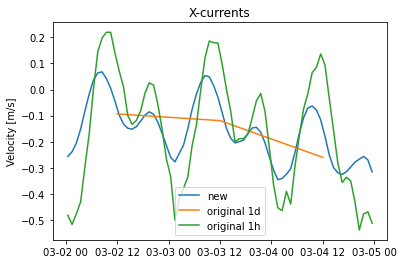

In [24]:
plt.plot(t_new, u_new[:,15,355,60],label='new')
plt.plot(t_d, u_d[:,15,355,60],label='original 1d')
plt.plot(t_og, u_og[:,15,355,60],label='original 1h')
plt.legend()
plt.title('X-currents')
plt.ylabel('Velocity [m/s]')

Text(0, 0.5, 'Velocity [m/s]')

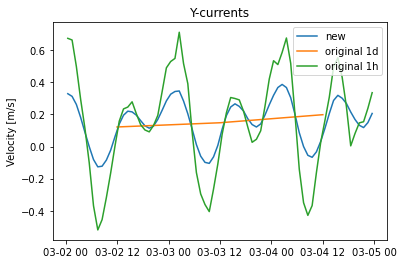

In [26]:
plt.plot(t_new, v_new[:,15,355,60],label='new')
plt.plot(t_d, v_d[:,15,355,60],label='original 1d')
plt.plot(t_og, v_og[:,15,355,60],label='original 1h')
plt.legend()
plt.title('Y-currents')
plt.ylabel('Velocity [m/s]')